In [1]:
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

from utils.network.Transformer import Transformer

# Load Model

In [ ]:
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hayao_net_G_float.pth
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Hosoda_net_G_float.pth
!wget -P models/CartoonGAN http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Paprika_net_G_float.pth	
!wget -P models/CartoonGAN http://vllab1.ucmerced.edu/~yli62/CartoonGAN/pytorch_pth/Shinkai_net_G_float.pth

In [ ]:
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/torch_t7/Hayao_net_G_float.t7
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/torch_t7/Hosoda_net_G_float.t7
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/torch_t7/Paprika_net_G_float.t7
!wget -P models/CartoonGAN -c http://vllab1.ucmerced.edu/~yli62/CartoonGAN/torch_t7/Shinkai_net_G_float.t7


In [11]:
model = Transformer()
model.load_state_dict(torch.load('models/CartoonGAN/Paprika_net_G_float.pth'))
model.eval()
print('Model loaded!')

Model loaded!


# Preprocessing

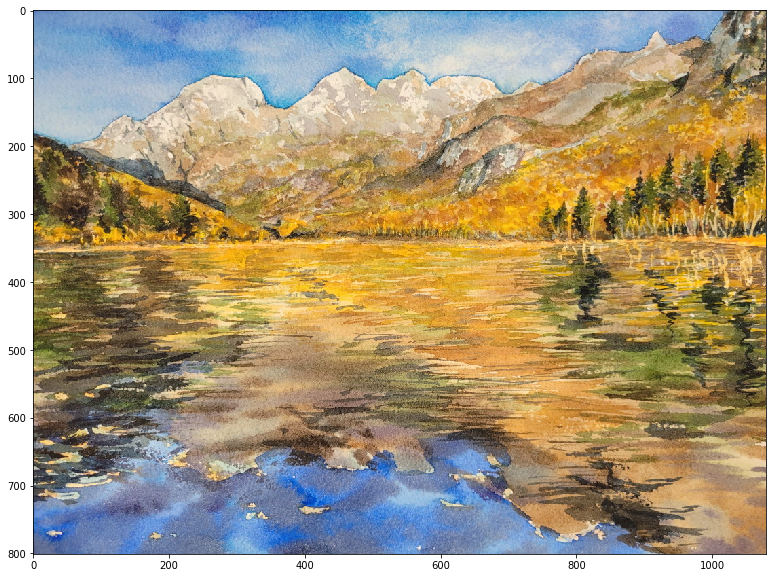

In [13]:
img_size = 450
img_path = 'media/landscape.jpg'

img = cv2.imread(img_path)

T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()
])

img_input = T(img).unsqueeze(0)

img_input = -1 + 2 * img_input # 0 - 1 -> -1 - +1

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

# Inference

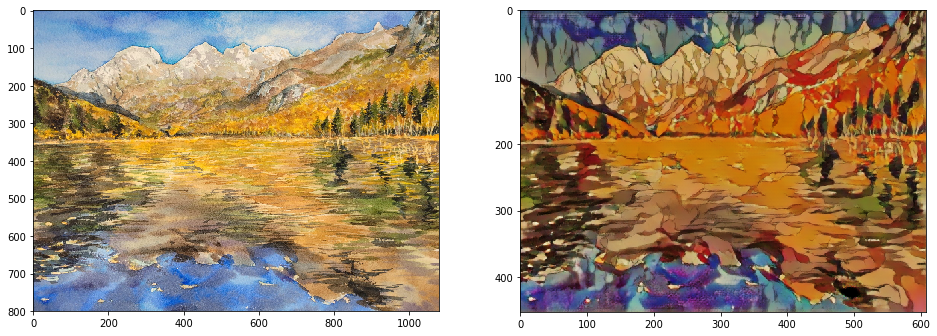

In [14]:
img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() + 1.) / 2.
img_output = img_output.transpose([1, 2, 0])

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(img[:, :, ::-1])
axes[1].imshow(img_output[:, :, ::-1])

References:

DCGAN, TextureNet, AdaIN and CycleGAN.

https://colab.research.google.com/drive/1s2XPNMwf6HDhrJ1FMwlW1jl-eQ2-_tlk?usp=sharing

Toonify with StyleGAN2